In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinic_df = pd.read_csv(clinical_trial_data_to_load)

In [4]:
# Combine the data into a single dataset
data=pd.merge(clinic_df,mouse_df,on="Mouse ID",how = "outer")
# data = data.sort_values(by=["Tumor Volume (mm3)","Timepoint","Metastatic Sites"],ascending=True)


In [5]:
# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
data_group = data.groupby(["Drug","Timepoint"]).mean()
mean_df = data_group.reset_index()
mean_df = mean_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
sem_data = data.groupby(["Drug","Timepoint"]).sem()
sem_df = sem_data.reset_index()
sem_df = sem_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
sem_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [8]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

drug_list = mean_df["Drug"].unique()
time_list = mean_df["Timepoint"].unique()
reformat_mean_df = pd.DataFrame({"Timepoint":(time_list)})

In [9]:
for drug in drug_list:
    drug_df = mean_df.loc[mean_df["Drug"]==drug,:]
    mean_list = drug_df["Tumor Volume (mm3)"].values.T.tolist()
    one_drug_df =pd.DataFrame({"Timepoint":(time_list),drug:(mean_list)})
    reformat_mean_df = pd.merge(reformat_mean_df,one_drug_df, on="Timepoint",how="outer"  )

In [10]:
mean_plot_data = reformat_mean_df.set_index("Timepoint")
mean_plot_data.head(10)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


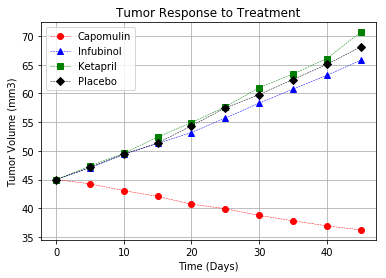

In [11]:
# Generate the Plot (with Error Bars)
# mean_plot_data = mean_plot_data[["Capomulin","Infubinol","Ketapril","Placebo"]]
# mean_plot_data.plot(kind="line", title="Tumor Response to Treatment",legend=True,grid = True)
capomulin, = plt.plot(time_list,mean_plot_data["Capomulin"],marker="o",color = "r",linestyle="--",label="Capomulin",linewidth = 0.5)
Infubinol, = plt.plot(time_list,mean_plot_data["Infubinol"],marker="^",color = "blue",linestyle="--",label="Infubinol",linewidth = 0.5)
Ketapril, = plt.plot(time_list,mean_plot_data["Ketapril"],marker="s",color = "green",linestyle="--",label="Ketapril",linewidth = 0.5)
Placebo, = plt.plot(time_list,mean_plot_data["Placebo"],marker="D",color = "black",linestyle="--",label="Placebo",linewidth = 0.5)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid()
# Show the Figure
plt.show()



In [12]:
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_data_group = data.groupby(["Drug","Timepoint"])
Met_mean_data = mean_data_group.mean()
del Met_mean_data['Tumor Volume (mm3)']

In [14]:
# Preview DataFrame
Met_mean_data.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_data=data.groupby(["Drug","Timepoint"]).sem()
Metastatic_sem_data =sem_met_data
del Metastatic_sem_data['Tumor Volume (mm3)']
del Metastatic_sem_data['Mouse ID']
# Convert to DataFrame

In [16]:
# Preview DataFrame
Metastatic_sem_data.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [17]:
# Minor Data Munging to Re-Format the Data Frames
Met_mean_data_restindex = Met_mean_data.reset_index()

In [18]:
Met_mean_data_restindex.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
# Preview that Reformatting worked
drug_list = Met_mean_data_restindex["Drug"].unique()
time_list = Met_mean_data_restindex["Timepoint"].unique()
reformat_Met_mean_df = pd.DataFrame({"Timepoint":(time_list)})
# reformat_Met_mean_df

In [20]:
for drug in drug_list:
    drug_df = Met_mean_data_restindex.loc[Met_mean_data_restindex["Drug"]==drug,:]
    mean_list = drug_df["Metastatic Sites"].values.T.tolist()
    one_drug_df =pd.DataFrame({"Timepoint":(time_list),drug:(mean_list)})
    reformat_Met_mean_df = pd.merge(reformat_Met_mean_df,one_drug_df, on="Timepoint",how="outer"  )

In [21]:
Met_mean_plot_data = reformat_Met_mean_df.set_index("Timepoint")
Met_mean_plot_data.head(10)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


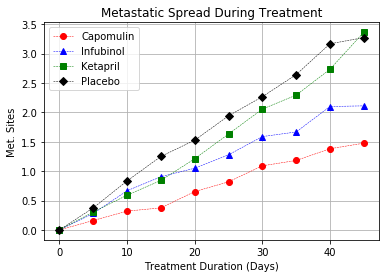

In [22]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
capomulin, = plt.plot(time_list,Met_mean_plot_data["Capomulin"],marker="o",color = "r",linestyle="--",label="Capomulin",linewidth = 0.5)
Infubinol, = plt.plot(time_list,Met_mean_plot_data["Infubinol"],marker="^",color = "blue",linestyle="--",label="Infubinol",linewidth = 0.5)
Ketapril, = plt.plot(time_list,Met_mean_plot_data["Ketapril"],marker="s",color = "green",linestyle="--",label="Ketapril",linewidth = 0.5)
Placebo, = plt.plot(time_list,Met_mean_plot_data["Placebo"],marker="D",color = "black",linestyle="--",label="Placebo",linewidth = 0.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="best")
plt.grid()
# Show the Figure
plt.show()

## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = data.groupby(["Drug","Timepoint"])
count_df_full = mice_group.count()
count_df_full = count_df_full.reset_index()

In [24]:
# Convert to DataFrame
# Preview DataFrame
count_df = count_df_full[["Drug","Timepoint","Mouse ID"]]
mice_data=count_df.rename(columns={"Mouse ID":"Mouse Count"})
mice_data.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [25]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
drug_list = mice_data["Drug"].unique()
time_list = mice_data["Timepoint"].unique()
reformat_mice_data = pd.DataFrame({"Timepoint":(time_list)})
for drug in drug_list:
    drug_df = mice_data.loc[mice_data["Drug"]==drug,:]
    mean_list = drug_df["Mouse Count"].values.T.tolist()
    one_drug_df =pd.DataFrame({"Timepoint":(time_list),drug:(mean_list)})
    reformat_mice_data = pd.merge(reformat_mice_data,one_drug_df, on="Timepoint",how="outer"  )
mice_data_data = reformat_mice_data.set_index("Timepoint")
mice_data_data.head(10)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


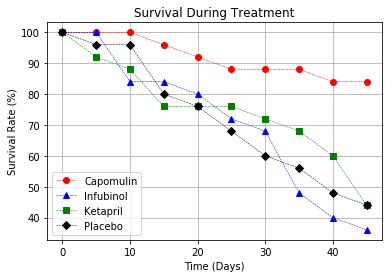

In [26]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
capomulin, = plt.plot(time_list,mice_data_data["Capomulin"]*100/25,marker="o",color = "r",linestyle="--",label="Capomulin",linewidth = 0.5)
Infubinol, = plt.plot(time_list,mice_data_data["Infubinol"]*100/25,marker="^",color = "blue",linestyle="--",label="Infubinol",linewidth = 0.5)
Ketapril, = plt.plot(time_list,mice_data_data["Ketapril"]*100/25,marker="s",color = "green",linestyle="--",label="Ketapril",linewidth = 0.5)
Placebo, = plt.plot(time_list,mice_data_data["Placebo"]*100/25,marker="D",color = "black",linestyle="--",label="Placebo",linewidth = 0.5)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.grid()
# Show the Figure
plt.show()
plt.show()

## Summary Bar Graph

In [27]:
each_data = data.loc[data["Drug"]=="Capomulin",:]
each_data[each_data["Timepoint"]==0]["Tumor Volume (mm3)"].mean()

45.0

In [28]:
# Calculate the percent changes for each drug
drug_list = data["Drug"].unique()
change_list = []
# time_list = data["Timepoint"].unique()
# Display the data to confirm
for drug in drug_list:
    each_data = data.loc[data["Drug"]==drug,:]
    start_volume = each_data[each_data["Timepoint"]==0]["Tumor Volume (mm3)"].mean()
    final_volume = each_data[each_data["Timepoint"]==45]["Tumor Volume (mm3)"].mean()
    change=final_volume-start_volume
    percent=change*100/start_volume
    change_list.append(percent)
tumor_change_df = pd.DataFrame({"Drug":(drug_list),"%Tumor Volume Change":change_list})

In [29]:
tumor_change_df

,Drug,%Tumor Volume Change
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
5,Ramicane,-22.320900
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


In [30]:
# Store all Relevant Percent Changes into a Tuple
tumor_change_data=tumor_change_df.set_index("Drug")
change_data=tumor_change_data.loc[["Capomulin","Infubinol","Ketapril","Placebo"],:]
change_list = change_data["%Tumor Volume Change"]
name_list = ["Capomulin","Infubinol","Ketapril","Placebo"]

In [31]:
fail_list =[]
fail_change = []
passing_list = []
passing_change =[]
for n in range(0,len(change_list)):
    if change_list[n] > 0:
        passing_list.append(change_list.index[n])
        passing_change.append(change_list[n])
    else:
        fail_list.append(change_list.index[n])
        fail_change.append(change_list[n])      
# print(fail_list)
# print(fail_change)
# print(passing_list)
# print(passing_change)

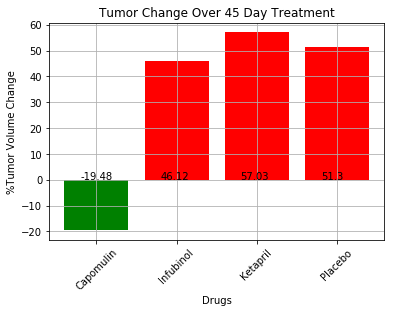

In [38]:
#solution 1
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
plt.bar(fail_list, fail_change, color = 'green',align="center")
plt.bar(passing_list, passing_change, color = 'red',align="center")
plt.xticks(tick_locations, ["Capomulin","Infubinol","Ketapril","Placebo"],rotation =45)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("%Tumor Volume Change")
# plt.text(x,y,str(change_list)) 
plt.grid()
for n in range(0,len(change_list)):
    plt.text(n-0.2,0,str(round(change_list[n],2)))
plt.show()

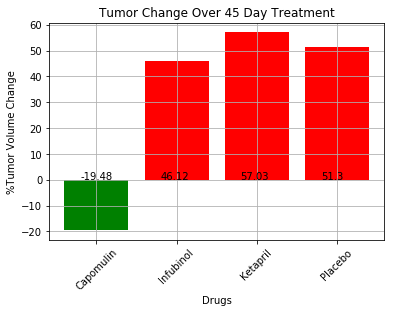

In [39]:
# Solution 2
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
x_axis = np.arange(len(change_data))
y = change_list
tick_locations = [value for value in x_axis]
mask1 = y < 0
mask2 = y >= 0

plt.bar(x_axis[mask1], y[mask1], color = 'green',align="center")
plt.bar(x_axis[mask2], y[mask2], color = 'red',align="center")
plt.xticks(tick_locations, ["Capomulin","Infubinol","Ketapril","Placebo"],rotation =45)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("%Tumor Volume Change")
# plt.text(x,y,str(change_list)) 
plt.grid()
for n in range(0,len(change_list)):
    plt.text(n-0.2,0,str(round(change_list[n],2)))
plt.show()

In [33]:
# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

<Figure size 432x288 with 0 Axes>